# TITANIC PROJECT

## Importing Libreries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [2]:
#Import the dataset

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [3]:
data.shape

(891, 12)

There are 891 Rows and 12 Columns in dataset

## Detailed description

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have object data type in Name, Sex, Ticket, Cabin, Embarked and Age, Fare are floating data type, and rest are integer data type. all are independent variable accept Survived. Survived is a target variable.

# Checking is there any null value

In [6]:
#check is there any null value present in any column

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three columns are having missing values in dataset.
As we see null values present, We need to work on that.

In [7]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [8]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [9]:
fe = data[["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]

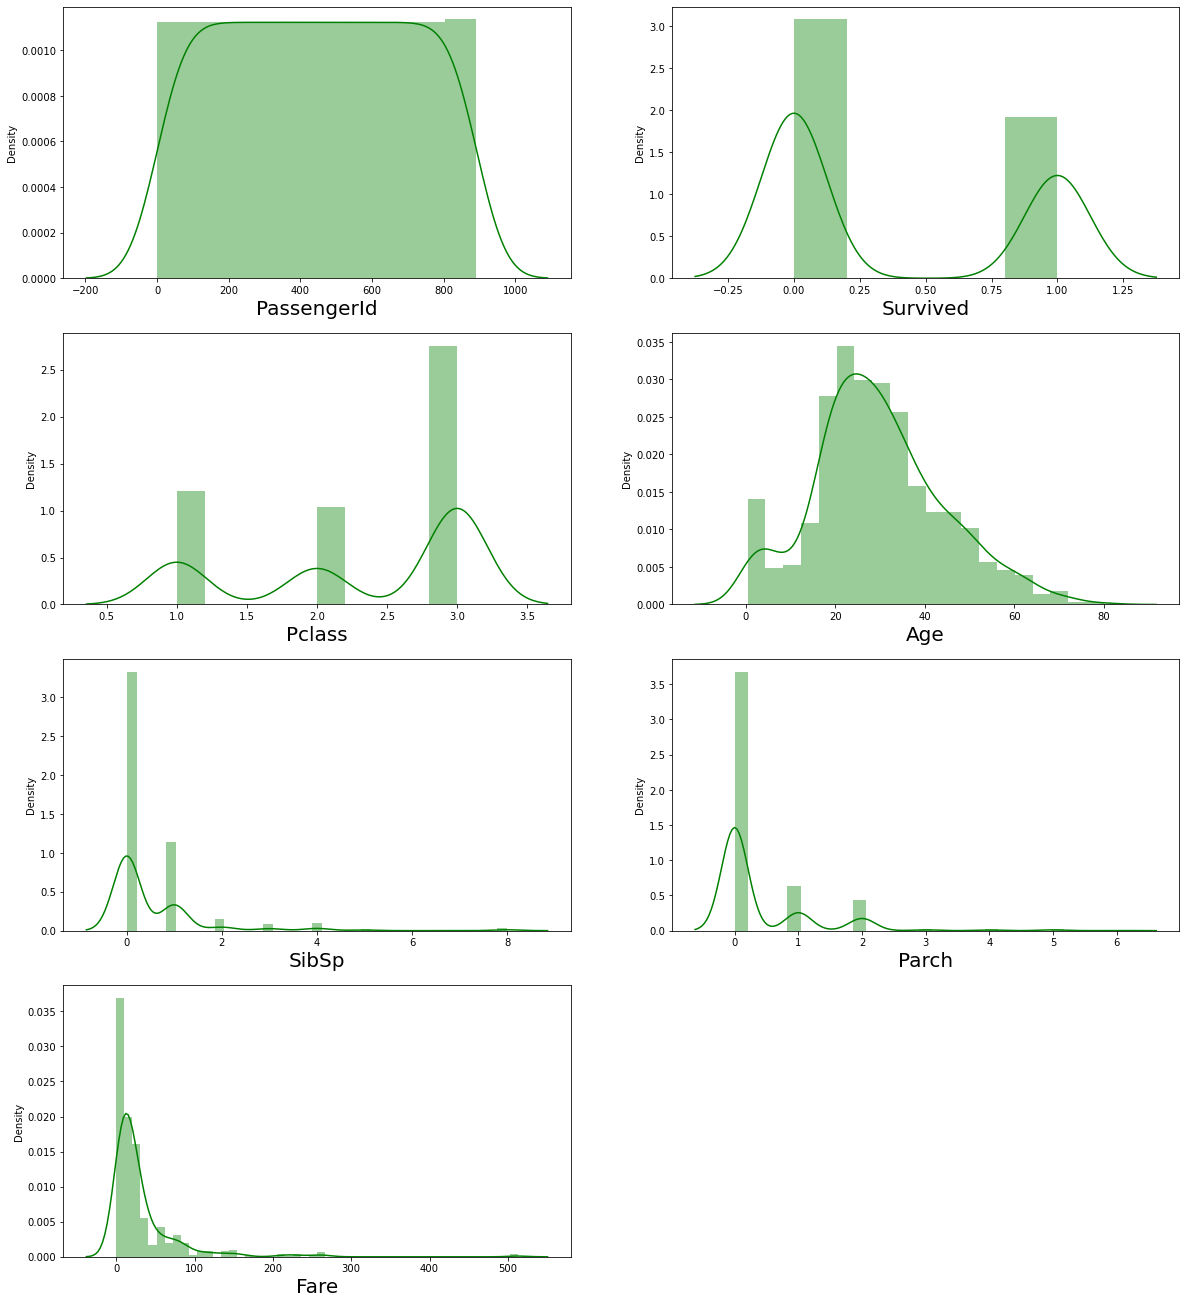

In [10]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot fare input variable is having skewness in it.
other Data columns are categorical in nature. So, we need remove skewness from Fare input variable.

Survived is a targate variable and it is having multible classes. so, it is a multiclassification problem.

### Analysis through boxplot

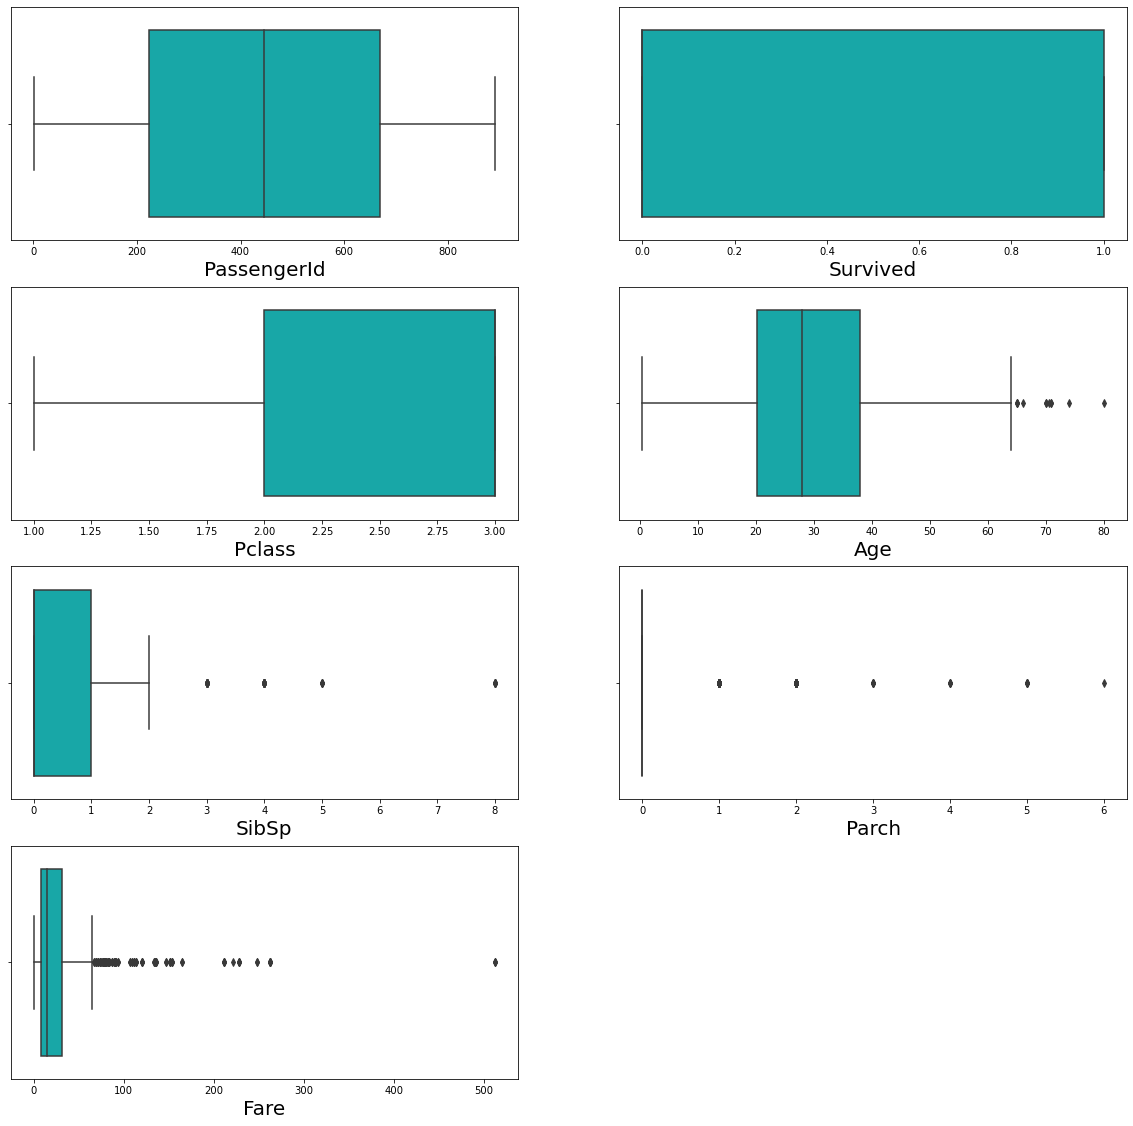

In [11]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 12: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

##### As we have seen in boxplot age, sibsp, parch and fare input variable is having outliers in it.

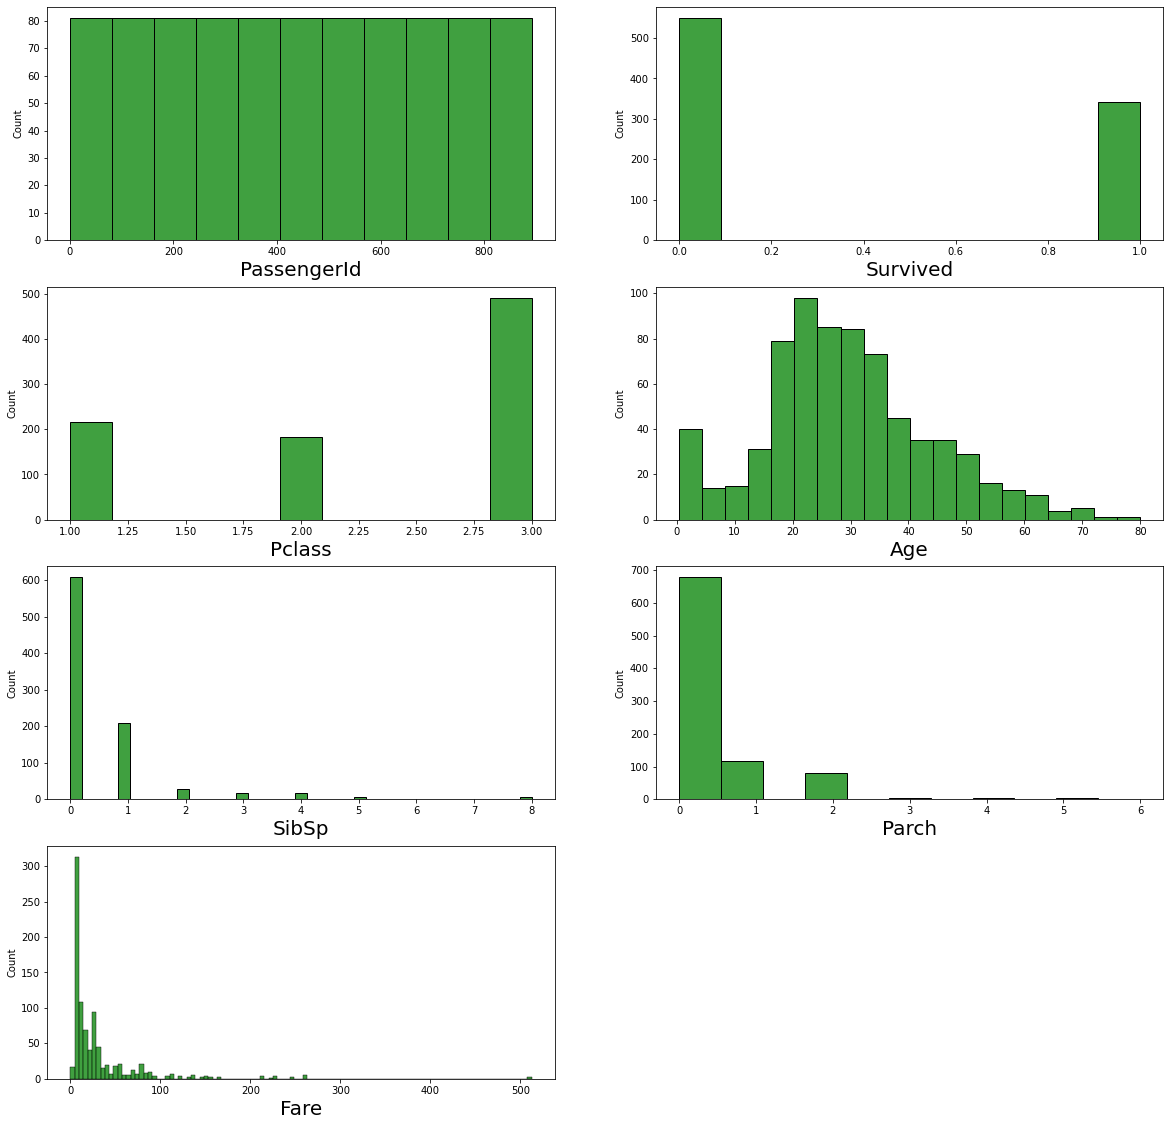

In [12]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

## Bi variate analysis
Bi variate analysis is works with two variables.

In [13]:
fe = data[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare"]]

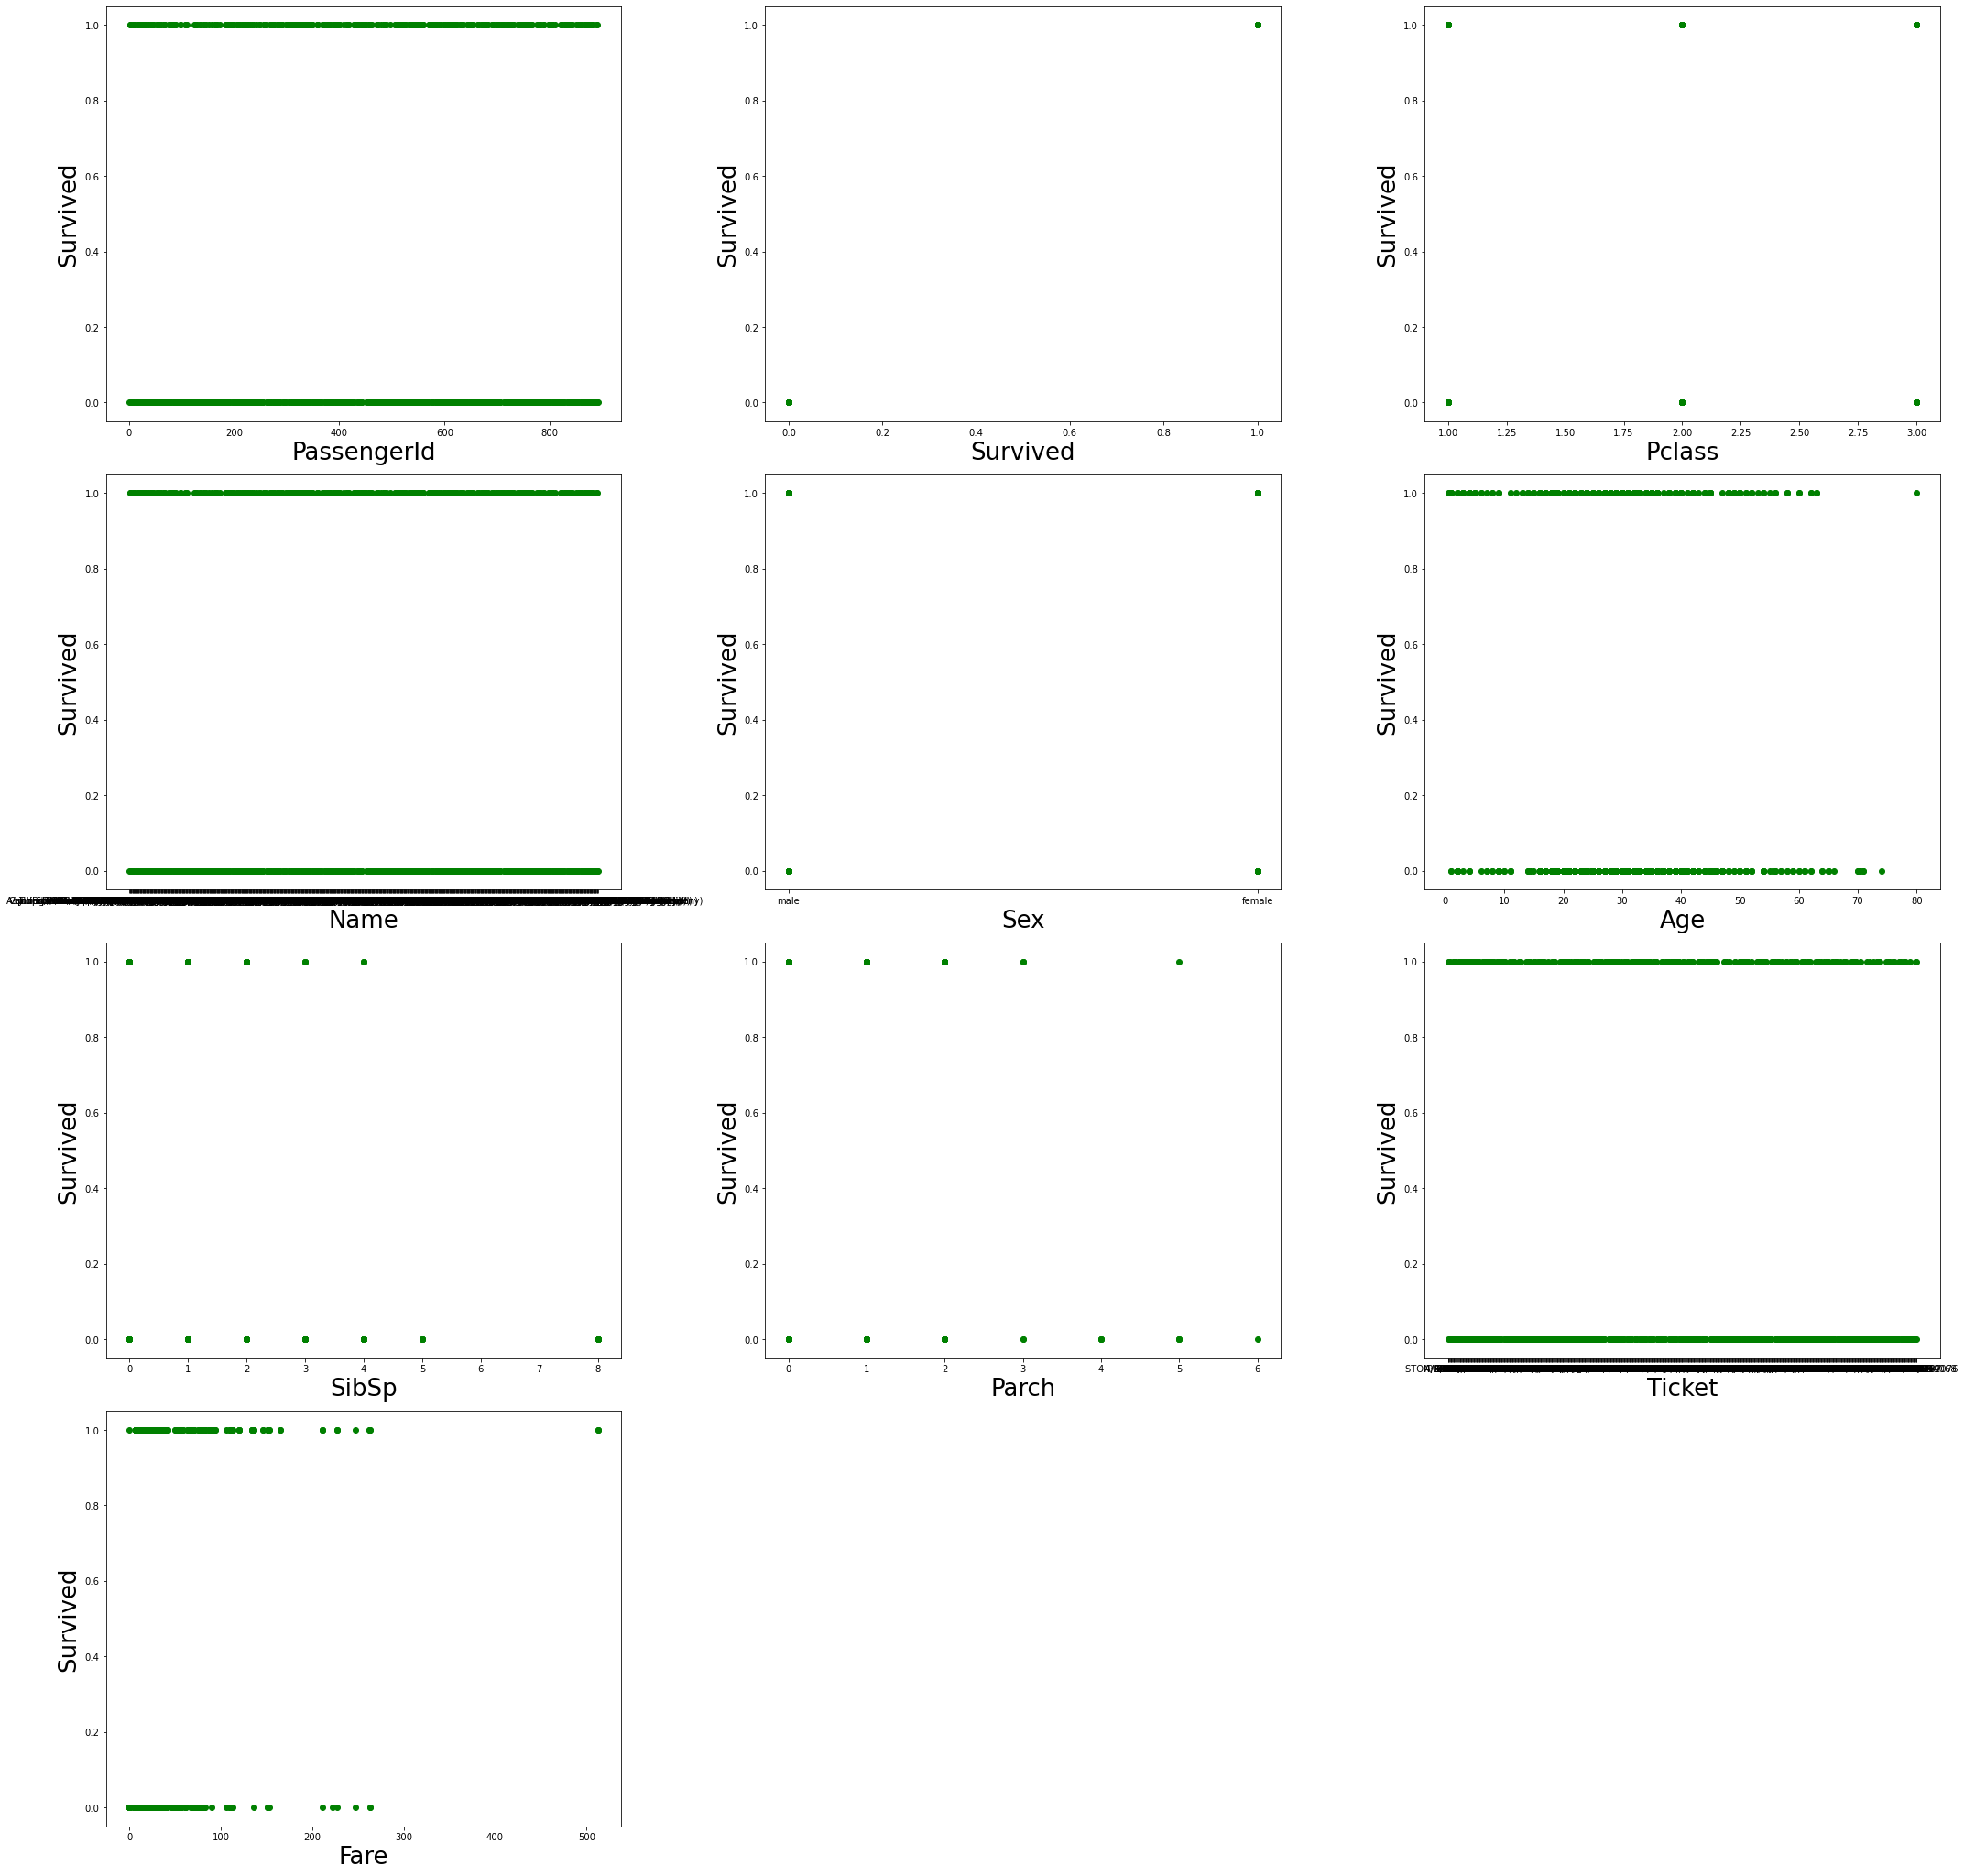

In [14]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(fe[column],fe['Survived'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Survived', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot all columns are having categorical data in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

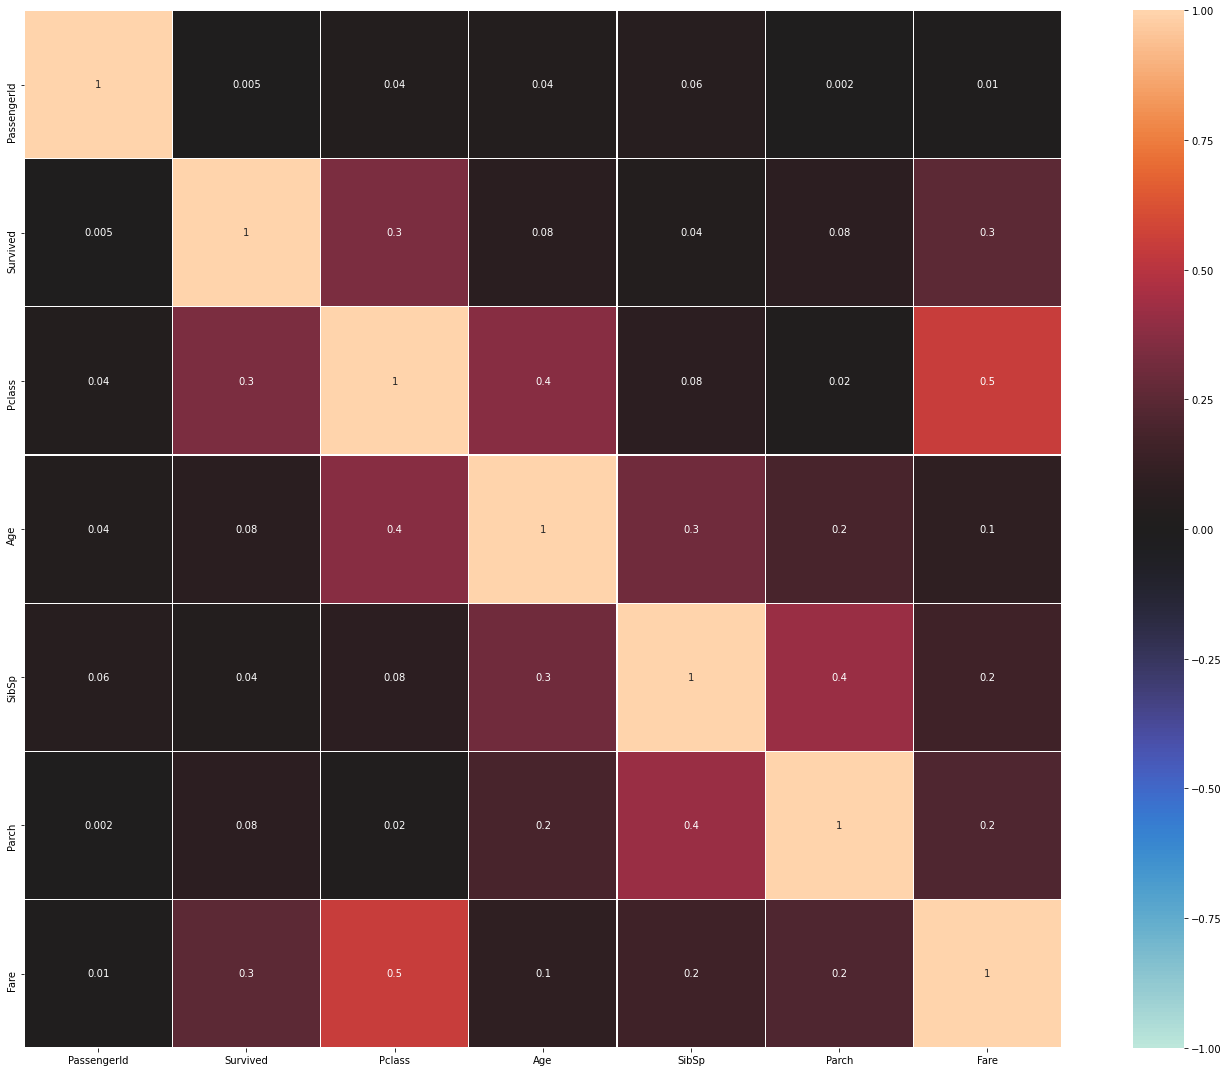

In [15]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'PassengerId' and 'Survived' correlation value is in less (0.008).

and survived and fare correlation value is very good.

##### Find out which columns are positively and negatively correlated with each other

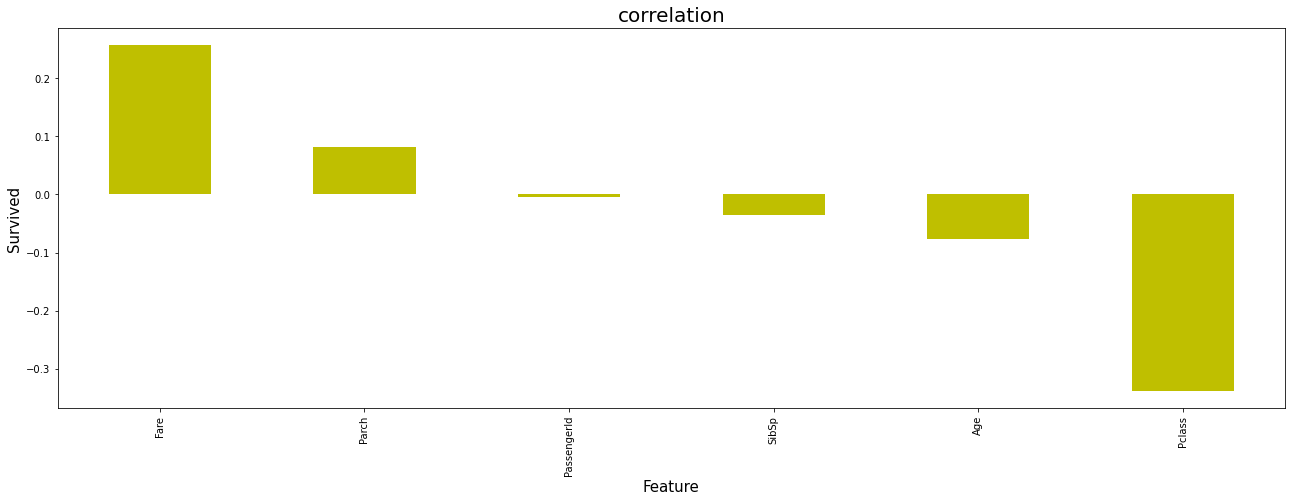

In [16]:
plt.figure(figsize=(22,7))
data.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Survived', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

as we have saw in the plot passengerId and target variable(Survived) is having very less correlation with target variable other. 

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

In [17]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Encoding and drop column
#### 1. Drop Name column

In [18]:
# Check unique values of Name column
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [19]:
#value caounts of Name column
data['Name'].value_counts()

Pears, Mrs. Thomas (Edith Wearne)                    1
Chambers, Mrs. Norman Campbell (Bertha Griggs)       1
Dahlberg, Miss. Gerda Ulrika                         1
Cavendish, Mr. Tyrell William                        1
Keane, Mr. Andrew "Andy"                             1
                                                    ..
Thorneycroft, Mrs. Percival (Florence Kate White)    1
Butt, Major. Archibald Willingham                    1
Mellinger, Miss. Madeleine Violet                    1
Carrau, Mr. Francisco M                              1
Murphy, Miss. Katherine "Kate"                       1
Name: Name, Length: 891, dtype: int64

##### Name column is having all unique values. So, we can drop that column. 

In [20]:
#drop Name column
data = data.drop(['Name'], axis=1)

#### 2. Encode sex column using binary encoder

In [21]:
# Check unique values of Sex column
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
#value caounts of sex column
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
# Replace Sex column to binary encoder
data['Sex'] = data['Sex'].replace({'male':1, 'female':0})

after using binary encoder male value change to 1 and female value will become 0.

#### 3. Encode/Drop the Ticket column 

In [24]:
# Check unique values of ticket column
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [25]:
#value counts of ticket value
data['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
347088                6
                     ..
2663                  1
11771                 1
SOTON/O.Q. 3101307    1
STON/O 2. 3101280     1
C 7075                1
Name: Ticket, Length: 681, dtype: int64

In [26]:
#Number of unique values of ticket columns
data['Ticket'].nunique()

681

In [27]:
#find how many percent of unique value present in ticket column
(681/891) *100

76.43097643097643

as we have seen above there is 76.43% unique values present in it.

which is near to 80%, so we can drop that column.

In [28]:
#drop Ticket column
data = data.drop(['Ticket'], axis=1)

Ticket column dropped.

#### 4. Encode/drop Cabin column

In [29]:
# Check unique values of Cabin column
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
#value counts of ticket value
data['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
C22 C26        3
              ..
A5             1
A20            1
D37            1
A7             1
C111           1
Name: Cabin, Length: 147, dtype: int64

In [31]:
data['Cabin'].isnull().sum()

687

As shown above 687 values are missing in it, which is near to 80%. so we can drop that column too.

In [32]:
#drop Cabin column
data = data.drop(['Cabin'], axis=1)

Cabin column dropped.

#### 5.Encode/drop Embarked  column

In [33]:
# Check unique values of Embarked column
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
#value counts of Embarked value
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [38]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [39]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


data after removing null values in embarked column and encding that.

#### 6. Drop PassengerId column 

In [40]:
# Check unique values of passengerid column
data['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

as we saw PassengerId contains all unique value so we can drop that column.

In [41]:
#drop PassengerId column
data = data.drop(['PassengerId'], axis=1)

## Handle missing values in age column.

In [42]:
data["Age"] = data["Age"].fillna(data['Age'].mean())

In [43]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Check the target variable

In [44]:
#value counts of Survived value
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

as we see there is class imbalance issue present in it.

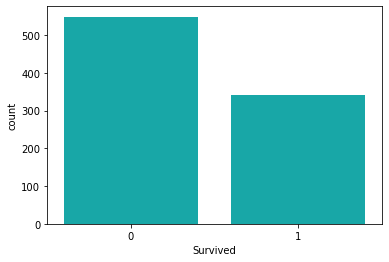

In [45]:
#visualization of target variable 
sn.countplot(data["Survived"], color = 'c')
plt.show()

as shown in plot we are facing class imbalance issue. Due to that the model will get bias. so, we need to do sampling over there.

## Sampling

In [46]:
X= data.drop("Survived", axis=1)
y= data.Survived

In [47]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

### Upsampling

In [49]:
from sklearn.utils import resample

In [50]:
#concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
not_sin = X[X.Survived == 0]
sinking = X[X.Survived == 1]

In [51]:
#upsample Minority
Sur_upsampled = resample(sinking,
                        replace=True, #sample with replacement
                        n_samples=len(not_sin), #match number in majority class
                        random_state=27)

In [52]:
#combine majority and upsampled minority
upsampled = pd.concat([not_sin, Sur_upsampled])

In [53]:
#check new class counts
upsampled.Survived.value_counts()

1    381
0    381
Name: Survived, dtype: int64

## Remove outliers

In [54]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

as shown in above only 2 columns are contineous in nature.

## 1.Outlier removal using Zscore

In [55]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['Age','Fare']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

shape before and after
shape before         : (891, 8)
shape after          : (864, 8)
Percentage Loss      : 0.030303030303030304


3.03% data loss after using Zscore technique

96.96% data remains.

In [56]:
new_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,0.650463,29.322935,0.520833,0.368056,26.500689,1.555556
std,0.485287,0.819028,0.477100,12.490450,1.104937,0.794651,29.400192,0.777235
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.860400,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,29.775000,2.000000
max,1.000000,3.000000,1.000000,66.000000,8.000000,6.000000,164.866700,2.000000


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [57]:
data2 = data

In [58]:
#features in which outliers are detected
fe = data2[["Age", "Fare"]]

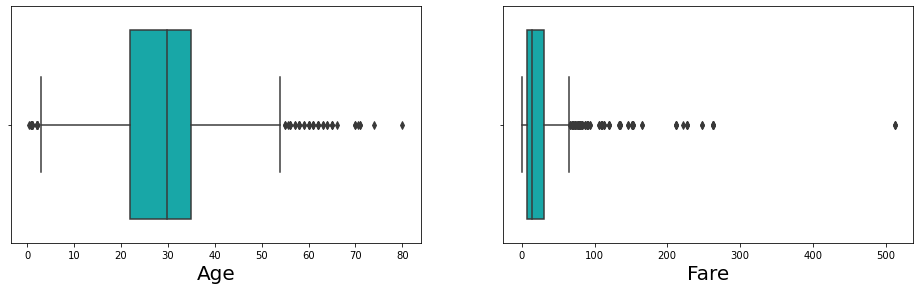

In [59]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(4,3, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [60]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [61]:
data2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [62]:
#as shown in boxplot we have outlier in higher side of Age also
#Remove outliers from higher side so, use higher side formula

Age_out = (q3.Age + (1.5*(iqr.Age)))
Age_out

54.5

In [63]:
index_out = np.where(data2['Age'] > Age_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
844,886,0,2,1,27.000000,0,0,13.0000,2
845,887,1,1,0,19.000000,0,0,30.0000,2
846,888,0,3,0,29.699118,1,2,23.4500,2
847,889,1,1,1,26.000000,0,0,30.0000,0


In [64]:
#as shown in boxplot we have outlier in lower side of Age also
#Remove outliers from higher side so, use higher side formula

Age_out = (q1.Age - (1.5*(iqr.Age)))
Age_out

2.5

In [65]:
index_out = np.where(data2['Age'] < Age_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
820,886,0,2,1,27.000000,0,0,13.0000,2
821,887,1,1,0,19.000000,0,0,30.0000,2
822,888,0,3,0,29.699118,1,2,23.4500,2
823,889,1,1,1,26.000000,0,0,30.0000,0


after removing outliers from Age 825 rows will remains in dataframe. 

In [66]:
#Check the Outliers for Fare
#Remove outliers from lower side so, use lower side formula

fare_out = (q3.Fare + (1.5*(iqr.Fare)))
fare_out


65.6344

In [67]:
index_out = np.where(data2['Fare'] > fare_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,2,1,3,0,26.000000,0,0,7.9250,2
2,3,1,1,0,35.000000,1,0,53.1000,2
3,4,0,3,1,35.000000,0,0,8.0500,2
4,5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
716,886,0,2,1,27.000000,0,0,13.0000,2
717,887,1,1,0,19.000000,0,0,30.0000,2
718,888,0,3,0,29.699118,1,2,23.4500,2
719,889,1,1,1,26.000000,0,0,30.0000,0


after removing outliers from Fare 721 rows will remains in dataframe.

#### After removing outliers using IQR technique there are 721 rows will remains in dataset.
Now, find how much data loss in IQR method

In [68]:
((891-721)/891)*100

19.07968574635241

19.08% data loss in IQR method

80.92% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [69]:
new_data.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       3.751753
Parch       2.840412
Fare        2.257178
Embarked   -1.328443
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Age and Fare in which only Fare column have skewness in it. So, we need to remove skewness from Fare only.

and maximum columns contains categorical values. so no need to remove skewness from that.

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [70]:
new_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

remove skewness of fare column.

## Apply Power transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [71]:
#applying log transformation on skewed columns

new_data['Fare'] = new_data['Fare'].replace(0,new_data['Fare'].mean())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

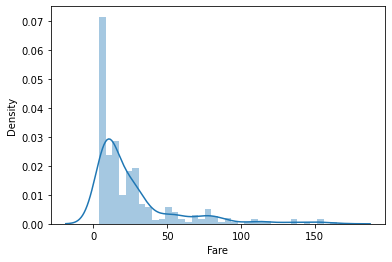

In [72]:
sn.distplot(new_data['Fare'])

##### As shown in plot less skewness present after using power transformation skewness removal technique.

## Seperating the columns into featuers and target:

In [99]:
upsampled.Survived= new_data["Survived"]

#### X= features, y=Target 

In [100]:
x1 = new_data.drop(columns = 'Survived', axis=1)
y1 = new_data['Survived']

## Scalling technique

In [101]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x1)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x1.columns

#lets check the values
vif

,vif,Features
0,2.246628,Pclass
1,1.116680,Sex
2,1.205114,Age
3,1.374937,SibSp
4,1.331785,Parch
5,2.334738,Fare
6,1.053893,Embarked


as we have saw there is not any vif value is greater than 5 for two columns, so no need to drop maximum value column to avoid multiclinearity issue.

In [103]:
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## Finding best random state 

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=.25, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8564814814814815 on Random_state  142


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y1, test_size=0.2, random_state = 142)

## 1.Logistic Regression Model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [108]:
pred_test=Log_reg.predict(x_test)

In [109]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.791907514450867
[[85 17]
 [19 52]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       102
           1       0.75      0.73      0.74        71

    accuracy                           0.79       173
   macro avg       0.79      0.78      0.78       173
weighted avg       0.79      0.79      0.79       173



In [110]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x1, y1, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7905363624143031

###### The Accuracy score for logistic regression model is : 79.19%
###### Cross validation score for logistic regression is : 79.05%

## 2.Random forest Classifier

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [112]:
Rfr =RandomForestClassifier(criterion = "entropy", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x1, y1, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  84.97109826589595
Cross Val Score:  78.81944444444446


###### The Accuracy score for Random Forest Classifier model is : 83.81%
###### Cross validation score for Random Forest Classifier is : 79.74%

## 3.Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.8208092485549133


In [115]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[88 14]
 [17 54]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.79      0.76      0.78        71

    accuracy                           0.82       173
   macro avg       0.82      0.81      0.81       173
weighted avg       0.82      0.82      0.82       173



In [116]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x1, y1, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7778263207420352

###### The Accuracy score for Decision tree Classifier model is : 80.34%
###### Cross validation score for Decision tree Classifier is : 77.78%

## 4.Support vector Classifier

In [117]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [118]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.8265895953757225


In [119]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[93  9]
 [21 50]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       102
           1       0.85      0.70      0.77        71

    accuracy                           0.83       173
   macro avg       0.83      0.81      0.82       173
weighted avg       0.83      0.83      0.82       173



In [120]:
cv_score= cross_val_score(sv, x1, y1, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6678384191423579

###### The Accuracy score for SVC model is : 82.65%
###### Cross validation score for SVC is : 66.78%

## Comparison of all model

###### The diffrence between accuracy score and cross validation score of logistic regression model is : 0.14%
###### The diffrence between accuracy score and cross validation score of Random Forest classifier model is : 4.07%
###### The diffrence between accuracy score and cross validation score of Decision Tree classifier model is : 2.56%
###### The diffrence between accuracy score and cross validation score of  SVC model is : 15.87%

### as shown in above table Logistic degression is having minimum difference, so Logistic Regression is best model

## Hyper parameter tunning

In [121]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [122]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [123]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [124]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [126]:
mod = LogisticRegression( C=0.1, penalty='l2', solver='newton-cg')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

79.76878612716763


after hyper parameter tunning accuracy score is: 79.76%

In [127]:
new_data['Survived'].unique()

array([0, 1], dtype=int64)

## ROC AUC curve to choose best model

In [128]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [129]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [130]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [131]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [132]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.7828638497652582

In [133]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.8355426677713338

In [134]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.8046119856393261

In [135]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.8079950289975144

## ROC AUC curve for fitted model

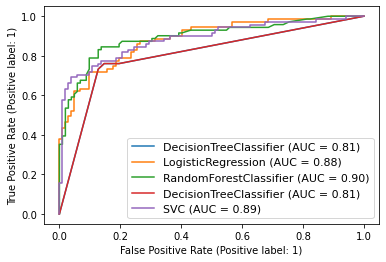

In [137]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model 

In [138]:
import joblib
joblib.dump(mod,"TitanicProject.pkl")

['TitanicProject.pkl']

## Loding model

In [139]:
model = joblib.load("TitanicProject.pkl")

In [140]:
prediction = model.predict(x_test)

In [141]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [142]:
prediction.to_csv('Results.csv', index = False)
#prediction saving